In [14]:
import random
import pandas as pd
import sklearn
from sklearn import preprocessing
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from tensorflow.keras import optimizers
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [15]:
def pre_proc():
    #filename = "second_split.csv"
    #n = sum(1 for line in open(filename)) - 1 #number of records in file (excludes header)
    #s = 400000 #desired sample size
    #skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
    #df = pd.read_csv(filename, skiprows=skip)
    df = pd.read_csv("shuffled_data_clean.csv")

    y=df['Label']

    del df['Label']
    del df['Unnamed: 0']
    del df['Unnamed: 0.1']
    del df['Unnamed: 0.1.1']

    #label encoding for object types
    le = preprocessing.LabelEncoder()
    #df['Flow ID','Src IP','Dst IP','Timestamp'] = le.fit_transform(df['Flow ID','Src IP','Dst IP','Timestamp'].astype(str))
    df['Flow ID'] = le.fit_transform(df['Flow ID'].astype(str))
    df['Src IP'] = le.fit_transform(df['Src IP'].astype(str))
    df['Dst IP'] = le.fit_transform(df['Dst IP'].astype(str))
    df['Timestamp'] = le.fit_transform(df['Timestamp'].astype(str))
    y = le.fit_transform(y.astype(str))

    #sc=StandardScaler()
    #X_scaled_data = sc.fit_transform(df)
    X_scaled_data = normalize(df, axis=0)
    return X_scaled_data, y

In [16]:
def train_model(X_scaled_data, y):
    
     #Train test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled_data, y,test_size = 0.25)   #scale the test data as well
    #Train Validation split
    #X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)
    
    model=SVC(kernel = 'poly', random_state = 5)
    model.fit(X_train, y_train)
    score = model.score(X_test,y_test)
    y_pred = model.predict(X_test)
    print(score)
    
    return y_pred, y_test

In [17]:
def prediction_result(y_pred,y_test):
    y_pred = np.rint(y_pred)
    yhat= y_pred.astype(int)
    (unique, counts) = np.unique(y_test, return_counts=True)
#--------------------------------------------------------------    
    f1 = np.asarray((unique, counts)).T
    print(f1)
    (unique, counts) = np.unique(yhat, return_counts=True)
    f2 = np.asarray((unique, counts)).T
    print(f2)
    
    #Prediction Plot
    plt.figure(figsize=(15, 5))
    plt.plot(y_pred[-100:], label="Predicted", color = 'red')
    plt.title("Predicted")
    plt.show()
    plt.figure(figsize=(15, 5))
    plt.plot(y_test[-100:], label ="Actual", color = 'green')
    plt.title("Actual")
    plt.show()
    
    return yhat

In [18]:
def report(y_test, yhat):
    
    #Confusion Matrix
    print(confusion_matrix(y_test, yhat))
    print(classification_report(y_test, yhat))
    
    FPR, TPR, _ = roc_curve(y_test, yhat)
    ROC_AUC = auc(FPR, TPR)
    print (ROC_AUC)

    plt.figure(figsize =[7,5])
    plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate', fontsize = 14)
    plt.ylabel('True Positive Rate', fontsize = 14)
    plt.title('ANN ROC ', fontsize= 14)
    plt.show()
    #Precision recall curve
    precision, recall, _ = precision_recall_curve(y_test, yhat)
    PR_AUC = auc(recall, precision)

    plt.figure(figsize=[7,5])
    plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=2)
    plt.xlabel('Recall', fontsize=14)
    plt.ylabel('Precision', fontsize=14)
    plt.title('ANN Precision & Recall Curve', fontsize=14)
    plt.legend(loc="lower right")
    plt.show()

In [19]:
def main():
    X_scaled_data, y = pre_proc()
    
    y_pred, y_test = train_model(X_scaled_data,y)
    
    yhat = prediction_result(y_pred,y_test)
    
    report(y_test,yhat)
    
    return yhat.tolist()

0.9987333333333334
[[    0 75148]
 [    1 74852]]
[[    0 74976]
 [    1 75024]]


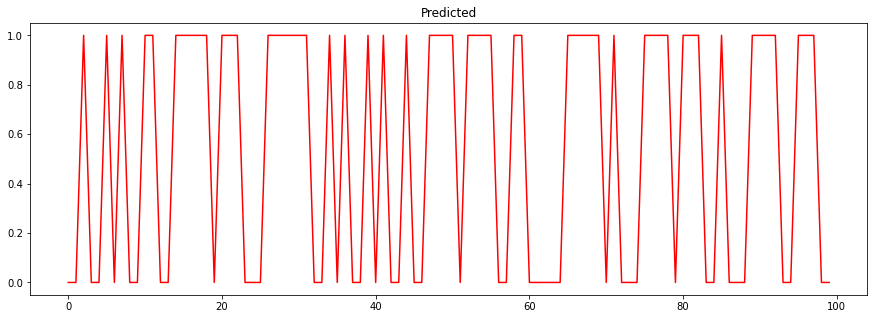

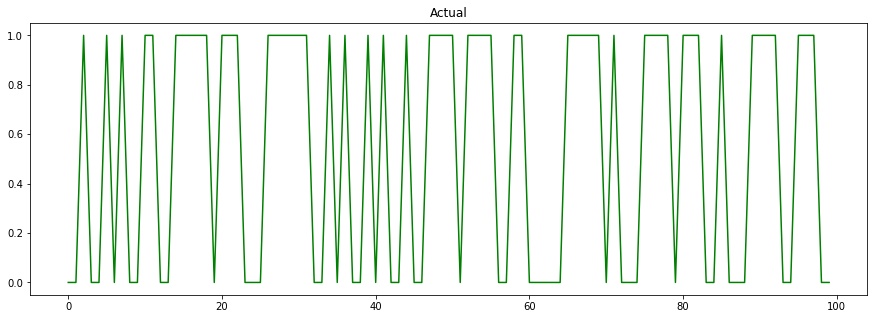

[[74967   181]
 [    9 74843]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     75148
           1       1.00      1.00      1.00     74852

    accuracy                           1.00    150000
   macro avg       1.00      1.00      1.00    150000
weighted avg       1.00      1.00      1.00    150000

0.9987355911652246


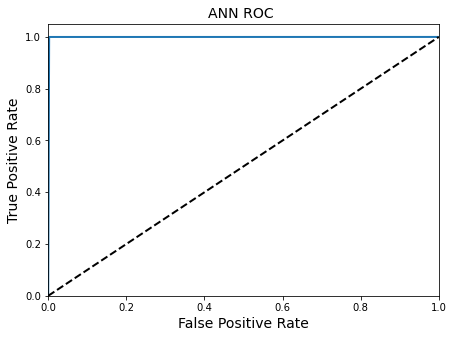

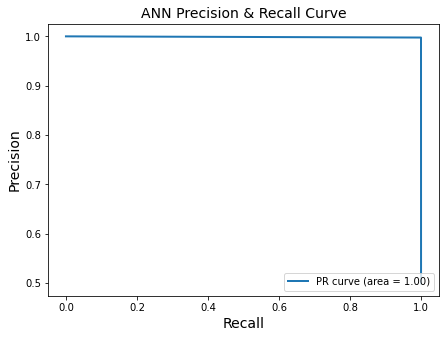

Stored 'yhat_SVM' (list)


In [20]:
if __name__ == "__main__":
    yhat_SVM = main()
    %store yhat_SVM